In [88]:
### Importing the necessary libraries ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


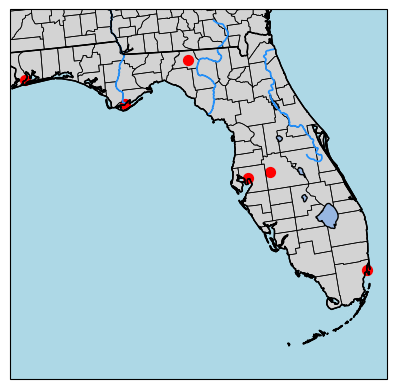

In [ ]:
### Creating map of Florida ###
fig, axes = plt.subplots(1, 1, subplot_kw={'projection': ccrs.LambertConformal()})
axes.set_extent([-87.5, -80.0, 24.5, 31.0], crs=ccrs.PlateCarree())
counties = cfeature.NaturalEarthFeature(category='cultural', name='admin_2_counties', scale='10m', facecolor='none', linewidth=0.5)
axes.add_feature(counties, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.COASTLINE, edgecolor='black')
axes.add_feature(cfeature.BORDERS, edgecolor='black')
axes.add_feature(cfeature.LAKES, edgecolor='black')
axes.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth = 1.25 )
axes.add_feature(cfeature.STATES, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.OCEAN, facecolor='lightblue')

### Creating Points for the Cities being analyzed ###
Tampa = [27.9475, -82.4584]
Miami = [25.7617, -80.1918]
Apalachicola = [29.7257, -84.9828]
Madison = [30.4461, -83.4193]
Lakeland = [27.9944024, -81.9498042]
Pensicola = [30.4213, -87.2169]

### Plotting those points on the map ###
axes.scatter(Tampa[1], Tampa[0], color='red', marker='o', s=50, label='Tampa', transform=ccrs.PlateCarree())
axes.scatter(Miami[1], Miami[0], color='red', marker='o', s=50, label='Miami', transform=ccrs.PlateCarree())   
axes.scatter(Apalachicola[1], Apalachicola[0], color='red', marker='o', s=50, label='Apalachicola', transform=ccrs.PlateCarree())
axes.scatter(Madison[1], Madison[0], color='red', marker='o', s=50, label='Madison', transform=ccrs.PlateCarree())
axes.scatter(Lakeland[1], Lakeland[0], color='red', marker='o', s=50, label='Lakeland', transform=ccrs.PlateCarree())  
axes.scatter(Pensicola[1], Pensicola[0], color='red', marker='o', s=50, label='Pensicola', transform=ccrs.PlateCarree())




<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Ethan\AppData\Local\Temp\ipykernel_15068\3810994835.py:2: SyntaxWarning: invalid escape sequence '\M'
  Apalachicola = pd.read_csv('C:\MyCode\MET3220C_FinalProject\data\Apalachicola_data.csv', skipinitialspace= True,


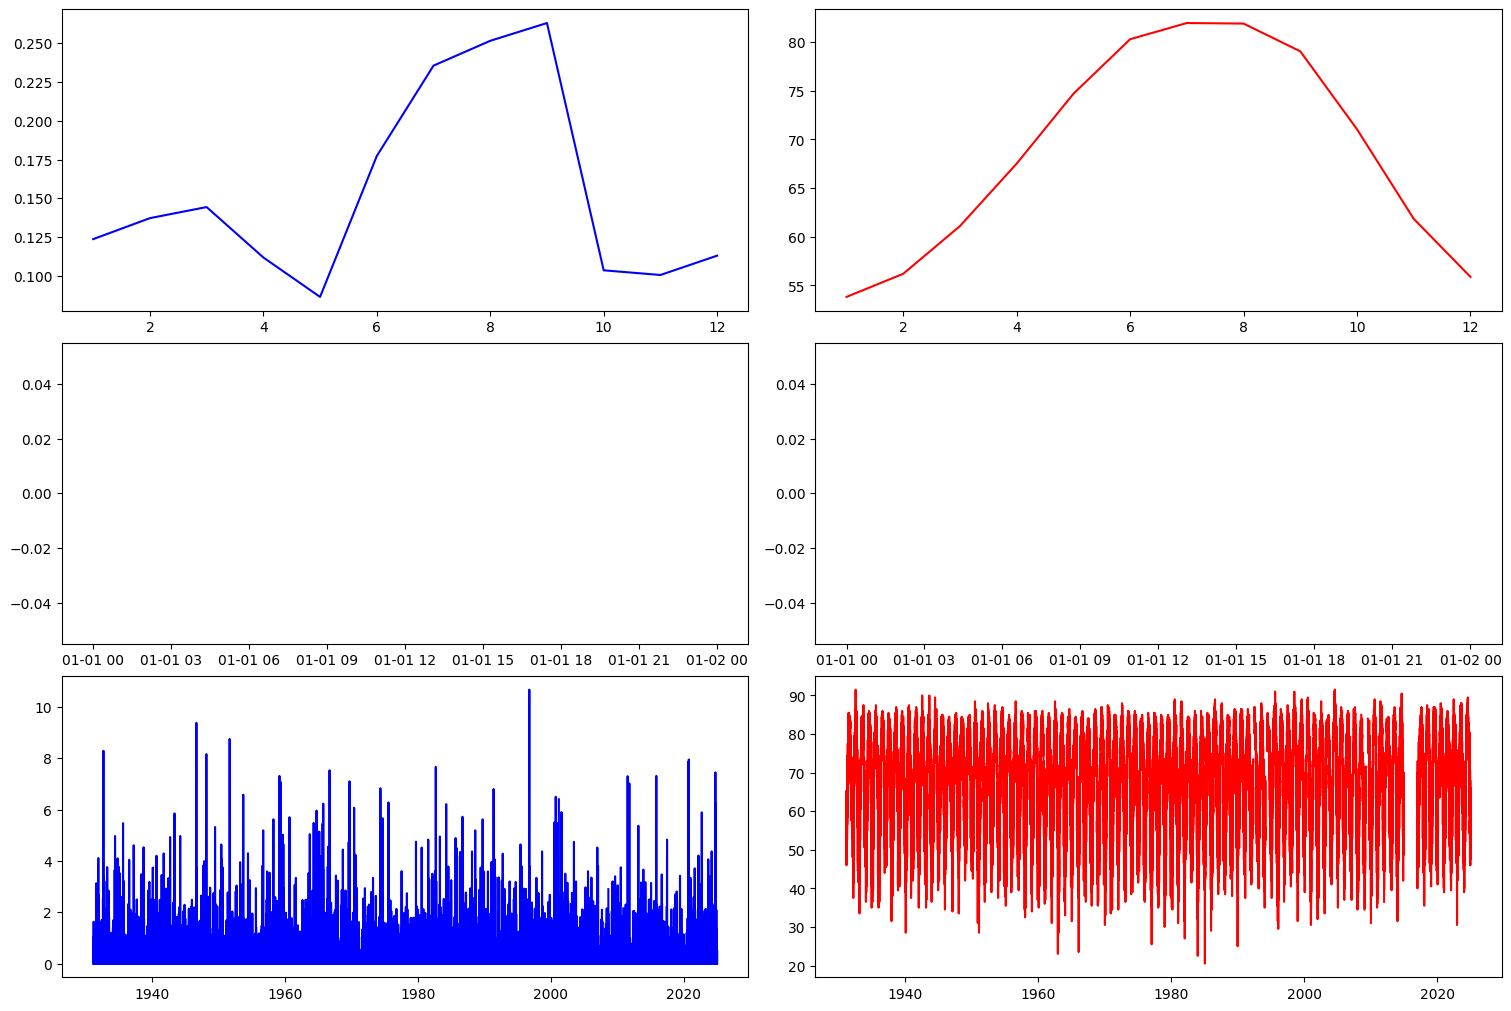

In [145]:
### Reading Data ###
Apalachicola = pd.read_csv('C:\MyCode\MET3220C_FinalProject\data\Apalachicola_data.csv', skipinitialspace= True, 
                           na_values=[-99.9, -99.99, -99.90000, -99.9999, -99.999999, -99.9999999])
### Creating Datetime Column ###
Apalachicola['date'] = pd.to_datetime(Apalachicola[['YEAR', 'MONTH', 'DAY']], errors = 'coerce')
### Dropping Rows with NaT in Date Column ### 
Apalachicola = Apalachicola.dropna(subset='date')
### Dropping Unnecessary Columns ###
Apalachicola = Apalachicola.drop(columns=['YEAR', 'MONTH', 'DAY'])
### Creating date column as index ###
Apalachicola = Apalachicola.set_index('date')
### Creating Data to be plotted ###
### Raw Precip and temp data ###
Apalachicola_precip = Apalachicola['PRECIPITATION']
Apalachicola_temp = Apalachicola['MEAN TEMP']
### Annual Cycle of Precip and Temp ###
Apalachicola_precip_ancycle = Apalachicola_precip.groupby(Apalachicola.index.month).mean()
Apalachicola_temp_ancycle = Apalachicola_temp.groupby(Apalachicola.index.month).mean()
### Anomaly Data precip and temp ###
Apalachicola_precip_anomaly = Apalachicola_precip - Apalachicola_precip_ancycle
Apalachicola_temp_anomaly = Apalachicola_temp - Apalachicola_temp_ancycle

### Plotting the Data ###
fig, axes = plt.subplots(3, 2, figsize=(15, 10), constrained_layout=True)
axes[0,0].plot(Apalachicola_precip_ancycle.index, Apalachicola_precip_ancycle, color='blue')
axes[0,1].plot(Apalachicola_temp_ancycle.index, Apalachicola_temp_ancycle, color='red')
axes[1,0].plot(Apalachicola_precip_anomaly.index, Apalachicola_precip_anomaly, color='blue')
axes[1,1].plot(Apalachicola_temp_anomaly.index, Apalachicola_temp_anomaly, color='red')
axes[2,0].plot(Apalachicola_precip.index, Apalachicola_precip, color='blue')
axes[2,1].plot(Apalachicola_temp.index, Apalachicola_temp, color='red')




In [ ]:
Apalachicola

,COOPID,PRECIPITATION,MAX TEMP,MIN TEMP,MEAN TEMP
date,,,,,
1931-01-01,80211,NaN,NaN,NaN,NaN
1931-01-02,80211,NaN,NaN,NaN,NaN
1931-01-03,80211,NaN,NaN,NaN,NaN
1931-01-04,80211,NaN,NaN,NaN,NaN
1931-01-05,80211,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-27,80211,0.00,62.0,56.0,59.0
2024-12-28,80211,0.00,71.0,61.0,66.0
2024-12-29,80211,0.51,75.0,53.0,64.0
